In [31]:
DATASET = "NSL-KDD"
CLASSIFIER = "ebmclassifier"

In [32]:
import pickle
import os
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

CURR_DIR = os.path.dirname(os.path.realpath('__file__'))
PROJ_ROOT = os.path.dirname(CURR_DIR)  # assuming .../PROJ_ROOT/scripts/visualize_EBM.ipynb

RESULTS_DIR = os.path.join(PROJ_ROOT, 'results', DATASET)
EBM_GLOBAL_EXPS = f"ebm_{CLASSIFIER}/ebm_global_exps.pk"

ebm_global_exps = pickle.load(open(os.path.join(PROJ_ROOT, 'results', DATASET, EBM_GLOBAL_EXPS), 'rb'))

In [33]:
feature_names = ebm_global_exps.data()['names']
feature_scores = ebm_global_exps.data()['scores']

sorted_indices = np.argsort(feature_scores)[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_indices][:20]
sorted_feature_scores = [feature_scores[i] for i in sorted_indices][:20]

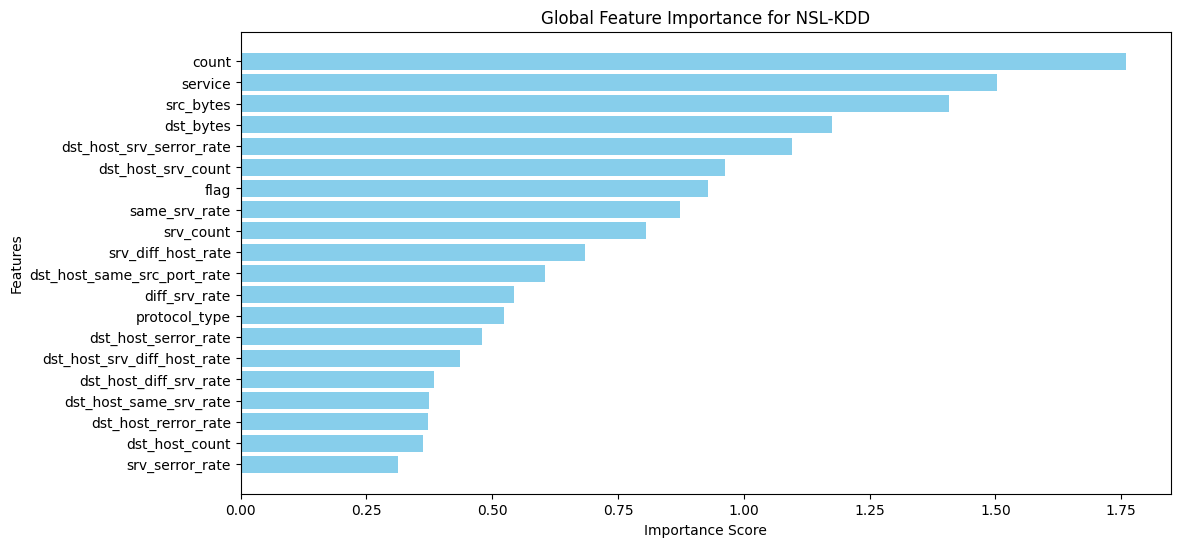

In [34]:
plt.figure(figsize=(12, 6))
plt.barh(sorted_feature_names, sorted_feature_scores, color='skyblue')
plt.title(f"Global Feature Importance for {DATASET}")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.gca().invert_yaxis()
plt.show()